### Data Cleaning

In [1]:
#General
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
#import combat
#from combat import combat
#import patsy

#Normalization
from sklearn.preprocessing import StandardScaler

#Outlier removal
import scipy
from scipy import stats
from scipy.stats import zscore

#Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
#pd.set_option('display.max_rows', 800)
#pd.set_option('display.max_columns', 800)

In [3]:
#Creating a dataframe from txt file

df = pd.read_csv('../data/matrix_standard_a3zyc4.txt', delimiter = "\t", header = 0)

df = df.iloc[:,:12]
pd.set_option('display.max_rows', 2500)
df

,Class,Lipid,Occurence,m/z,RTmin,RTmax,01pcDNA,02pcDNA,03pcDNA,04Creb3L1ACAoverex,05Creb3L1ACAoverex,06Creb3L1ACAoverex
0,GL02_DAG,2010003_34:0,NH4 1,614.57178,0.69,0.73,9.606318e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,GL02_DAG,2010004_34:1,NH4 1,612.55615,0.72,0.73,6.375472e+06,0.000000e+00,5.112208e+06,2.347739e+06,4.847248e+06,0.000000e+00
2,GL02_DAG,2010008_38:0,NH4 1,670.63440,0.71,0.73,4.845203e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,GL02_DAG,2010010_32:1,NH4 1,584.52484,0.72,0.73,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.361093e+06
4,GL02_DAG,2010011_32:2,NH4 1,582.50922,0.72,0.73,0.000000e+00,2.699994e+06,0.000000e+00,1.423795e+06,0.000000e+00,0.000000e+00
5,GL02_DAG,2010012_33:0,NH4 1,600.55615,0.71,0.73,0.000000e+00,5.861224e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,GL02_DAG,2010013_33:1,NH4 1,598.54047,0.72,0.73,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,GL02_DAG,2010016_33:2,NH4 1,596.52484,0.72,0.73,3.134348e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.797591e+06,2.475492e+06
8,GL02_DAG,2010019_33:3,NH4 1,594.50922,0.71,0.73,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,GL02_DAG,2010021_34:2,NH4 1,610.54047,0.72,0.73,5.118185e+06,4.654961e+06,4.195879e+06,0.000000e+00,2.445170e+06,3.032505e+06


In [4]:
#Selection of important characters on columns Class and Lipid

Class2 = []
for row in df['Class']:
    row = row.split('_')
    if row[1] == 'PxCer':
        Class2.append('SM')
    else:
        Class2.append(row[1])
    
df.insert(0, 'Class2', Class2)

Lipid2 = []
for row in df['Lipid']:
    row = row.split('_')
    if row[0] == '1deoxyCer':
        Lipid2.append(f'1deoxyCer({row[1]})')
    elif row[0].startswith('EX'):
        Lipid2.append(f'EX({row[1]})')
    else:
        Lipid2.append(f'({row[1]})')
    
df.insert(2, 'Lipid2', Lipid2)

<AxesSubplot:>

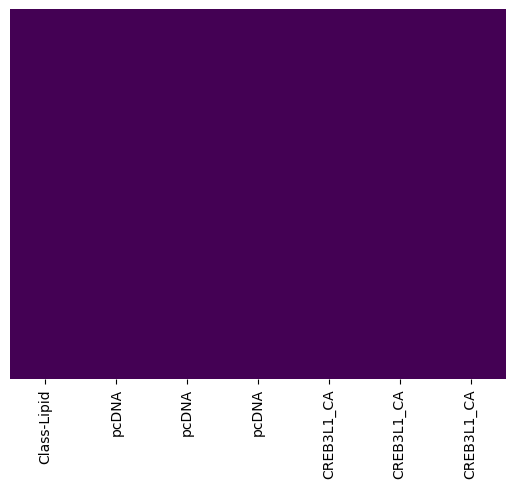

In [5]:
#Elimination of unnecesary columns
df['Class-Lipid'] = df['Class2'] + df['Lipid2']
first_col = df.pop('Class-Lipid')
df.insert(0, 'Class-Lipid', first_col)
df = df.drop(['Occurence','m/z','RTmin','RTmax', 'Class', 'Lipid', 'Class2', 'Lipid2'], axis = 1)
#Rename Columns
df = df.rename(columns = {'01pcDNA': 'pcDNA', '02pcDNA': 'pcDNA', '03pcDNA': 'pcDNA',
                          '04Creb3L1ACAoverex': 'CREB3L1_CA', '05Creb3L1ACAoverex': 'CREB3L1_CA', '06Creb3L1ACAoverex': 'CREB3L1_CA'}
               , inplace = False)

sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

<AxesSubplot:>

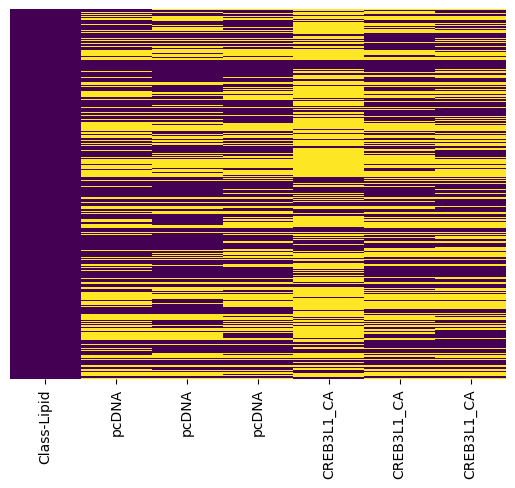

In [6]:
#transform 0 to nans
df.replace(0, np.nan, inplace=True)
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

<AxesSubplot:>

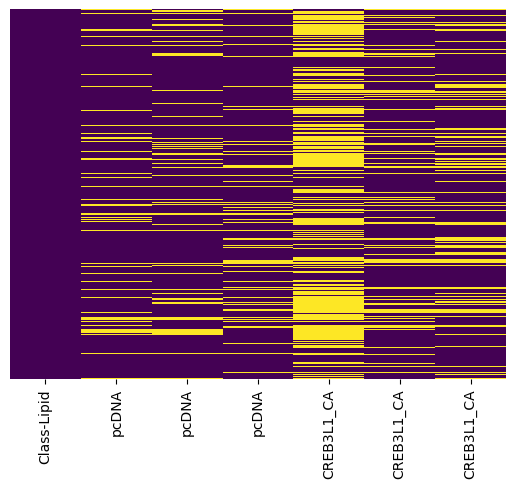

In [7]:
# dropping the NaNs, treshols 3 means that those rows with at least 3 non-NaN values are kept
df = df.dropna(axis=0, how='any', thresh=3, inplace=False)
df = df.reset_index(drop = True)
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

In [8]:
#transpose of the dataframe
df_t = df.T
df_t = df_t.reset_index(drop = False)
#df_t = df_t.convert_dtypes()
df_t

,index,0,1,2,3,4,5,6,7,8,...,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540
0,Class-Lipid,DAG(34:1),DAG(32:2),DAG(33:2),DAG(34:2),DAG(35:1),DAG(35:2),DAG(36:1),DAG(36:3),DAG(37:1),...,HexCer(38:0),HexCer(34:1),HexCer(36:1),HexCer(36:2),HexCer(38:2),HexCer(32:2),HexCer(34:2),HexCer(36:0),HexCer(36:0),HexCer(34:1)
1,pcDNA,6375471.875,NaN,3134347.890625,5118185.25,NaN,2481145.734375,4901358.6875,3272995.03125,2390757.21875,...,1150819.460938,612375.793457,611682.876465,7028293.78125,2557555.378906,30557231.5625,15069394.84375,464068.360352,1096604.544922,NaN
2,pcDNA,NaN,2699994.0,NaN,4654960.8125,NaN,2573727.625,NaN,3394526.6875,1958704.378906,...,NaN,532203.037109,485371.884766,6660802.96875,2379029.097656,27452437.609375,13743588.984375,3050190.59375,NaN,NaN
3,pcDNA,5112208.25,NaN,NaN,4195878.5625,NaN,1761541.992188,4192781.875,NaN,1911641.128906,...,406875.871094,423245.957031,344309.837891,4963913.078125,1864227.509766,18364569.296875,9442878.875,NaN,585009.99707,324505.839844
4,CREB3L1_CA,2347739.144531,1423794.828125,NaN,NaN,1751452.483398,1227126.8125,1644034.523438,NaN,1214368.782227,...,NaN,NaN,NaN,7533577.671875,2245625.699219,20877884.796875,14120758.390625,3111990.796875,NaN,NaN
5,CREB3L1_CA,4847248.5,NaN,1797590.984375,2445169.71875,2011625.363281,1880423.539062,3745369.90625,1343966.109375,NaN,...,NaN,474987.929688,480777.253906,7508730.960938,2843088.316406,24283537.703125,14208734.1875,NaN,NaN,279193.708984
6,CREB3L1_CA,NaN,NaN,2475491.609375,3032505.1875,2445076.242188,2021349.710938,3772067.5625,NaN,2072840.605469,...,518017.839844,473457.42627,500688.621094,7582586.140625,2832982.238281,25042501.59375,14955340.03125,NaN,NaN,NaN


/var/folders/_x/tfg8s2ks4n1ftkkwzp5sqjpc0000gn/T/ipykernel_11358/1131074213.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_t = df_t.groupby(['index']).apply(lambda x: x.fillna(x.mean()))
/var/folders/_x/tfg8s2ks4n1ftkkwzp5sqjpc0000gn/T/ipykernel_11358/1131074213.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_t = df_t.groupby(['index']).apply(lambda x: x.fillna(x.mean()))


<AxesSubplot:>

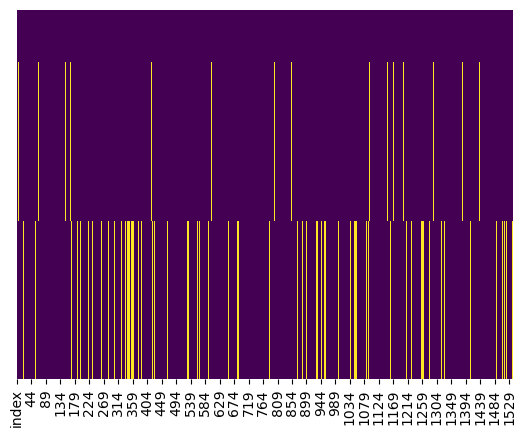

In [9]:
#group by condition and fill nan with the mean of the condition
df_t = df_t.groupby(['index']).apply(lambda x: x.fillna(x.mean()))
df_t = df_t.reset_index(drop = True)
sns.heatmap(df_t.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

<AxesSubplot:>

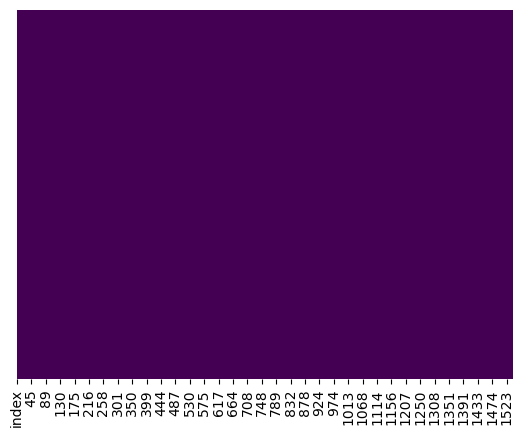

In [10]:
#droppping the rest of the Nans
df_t = df_t.dropna(axis=1, inplace=False)
sns.heatmap(df_t.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

In [11]:
df_t = df_t.rename(columns=df_t.iloc[0])
df_t.drop(0,0,inplace=True)
df_t

/var/folders/_x/tfg8s2ks4n1ftkkwzp5sqjpc0000gn/T/ipykernel_11358/3022850967.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_t.drop(0,0,inplace=True)


,Class-Lipid,DAG(34:1),DAG(32:2),DAG(33:2),DAG(34:2),DAG(35:2),DAG(36:1),DAG(36:3),DAG(37:1),DAG(36:4),...,HexCer(41:0),HexCer(38:0),HexCer(34:1),HexCer(36:1),HexCer(36:2),HexCer(38:2),HexCer(32:2),HexCer(34:2),HexCer(36:0),HexCer(34:1)
1,pcDNA,6375471.875,2699994.0,3134347.890625,5118185.25,2481145.734375,4901358.6875,3272995.03125,2390757.21875,1025467.015625,...,279106.168945,1150819.460938,612375.793457,611682.876465,7028293.78125,2557555.378906,30557231.5625,15069394.84375,464068.360352,324505.839844
2,pcDNA,5743840.0625,2699994.0,3134347.890625,4654960.8125,2573727.625,4547070.28125,3394526.6875,1958704.378906,1520593.835938,...,296724.526367,778847.666016,532203.037109,485371.884766,6660802.96875,2379029.097656,27452437.609375,13743588.984375,3050190.59375,324505.839844
3,pcDNA,5112208.25,2699994.0,3134347.890625,4195878.5625,1761541.992188,4192781.875,3333760.859375,1911641.128906,1273030.425781,...,261487.811523,406875.871094,423245.957031,344309.837891,4963913.078125,1864227.509766,18364569.296875,9442878.875,1757129.477051,324505.839844
4,CREB3L1_CA,2347739.144531,1423794.828125,2136541.296875,2738837.453125,1227126.8125,1644034.523438,1343966.109375,1214368.782227,274575.90625,...,405679.892578,518017.839844,474222.677979,490732.9375,7533577.671875,2245625.699219,20877884.796875,14120758.390625,3111990.796875,279193.708984
5,CREB3L1_CA,4847248.5,1423794.828125,1797590.984375,2445169.71875,1880423.539062,3745369.90625,1343966.109375,1643604.693848,274575.90625,...,348550.621094,518017.839844,474987.929688,480777.253906,7508730.960938,2843088.316406,24283537.703125,14208734.1875,3111990.796875,279193.708984
6,CREB3L1_CA,3597493.822266,1423794.828125,2475491.609375,3032505.1875,2021349.710938,3772067.5625,1343966.109375,2072840.605469,274575.90625,...,462809.164062,518017.839844,473457.42627,500688.621094,7582586.140625,2832982.238281,25042501.59375,14955340.03125,3111990.796875,279193.708984


### Normalization function
#### by=0 --> normalization by PCEX(34:1)
#### by=1 --> normalization by the sum of each condition

In [13]:
def normalization(df,by=0,col_names=None):
    '''
    normalice dataset acording to the specified
    df: lipidomics dataset with condition/sample names on the first column
    and lipid species as column names
    by = 0 --> normalization by the value of PCEX(34:1)
         1 --> normalization by the sum of of the lipid count for each condition/sample
    '''
    if by == 0:
        df.iloc[:,1:] = df.iloc[:,1:].div(df.iloc[:,1:]['PCEX(34:1)'], axis=0)
        df = df.drop(['PCEX(34:1)'], axis = 1)
        df_n = df.T
        df_n.columns = ['pcDNA', 'pcDNA', 'pcDNA', 'CREB3L1_CA', 'CREB3L1_CA', 'CREB3L1_CA']
        df_n = df_n.iloc[1: , :]
        
    if by == 1:
        df2 = df.T
        df2.columns = ['pcDNA', 'pcDNA', 'pcDNA', 'CREB3L1_CA', 'CREB3L1_CA', 'CREB3L1_CA']
        df2 = df2.iloc[1: , :]
        df_n = df2.div(df2.sum())
        
    return df_n

In [19]:
df_n = normalization(df_t,by=1)
df_n

,pcDNA,pcDNA,pcDNA,CREB3L1_CA,CREB3L1_CA,CREB3L1_CA
DAG(34:1),0.000245,0.000243,0.000243,0.00011,0.000244,0.000162
DAG(32:2),0.000104,0.000114,0.000128,0.000067,0.000072,0.000064
DAG(33:2),0.000121,0.000132,0.000149,0.0001,0.000091,0.000112
DAG(34:2),0.000197,0.000197,0.000199,0.000128,0.000123,0.000137
DAG(35:2),0.000096,0.000109,0.000084,0.000058,0.000095,0.000091
DAG(36:1),0.000189,0.000192,0.000199,0.000077,0.000189,0.00017
DAG(36:3),0.000126,0.000143,0.000158,0.000063,0.000068,0.000061
DAG(37:1),0.000092,0.000083,0.000091,0.000057,0.000083,0.000094
DAG(36:4),0.000039,0.000064,0.00006,0.000013,0.000014,0.000012
DAG(37:2),0.000101,0.000097,0.000094,0.000096,0.000086,0.000107


## Volcano Plot

In [20]:
#creating new df with mean, std and n.obs
df2 = df_n.astype('float64').copy()
df_pvalue = pd.DataFrame()
df_pvalue['CREB3L1_CA_mean'] = df2.groupby(axis = 1, level = 0).mean()['CREB3L1_CA']
df_pvalue['CREB3L1_CA_std'] = df2.groupby(axis = 1, level = 0).std()['CREB3L1_CA']
df_pvalue['CREB3L1_CA_n'] = 3
df_pvalue['pcDNA_mean'] = df2.groupby(axis = 1, level = 0).mean()['pcDNA']
df_pvalue['pcDNA_std'] = df2.groupby(axis = 1, level = 0).std()['pcDNA']
df_pvalue['pcDNA_n'] = 3

#pvalue function
df_pvalue['pvalue'] = df_pvalue.apply(lambda x: stats.ttest_ind_from_stats(x['CREB3L1_CA_mean'],x['CREB3L1_CA_std'],x['CREB3L1_CA_n'], 
                                                     x['pcDNA_mean'],x['pcDNA_std'],x['pcDNA_n'])[1],axis=1)
# convert pvalue to minus log10
df_pvalue['pvalue'] = df_pvalue['pvalue'].transform(lambda x: -np.log10(x))
df_pvalue = df_pvalue.rename(columns = {'pvalue': 'minuslog10_pvalue'}, inplace = False)

#fold change
df_pvalue['fold_change'] = df_pvalue['CREB3L1_CA_mean'].div(df_pvalue['pcDNA_mean'], axis = 0)

# convert fold change to log2
df_pvalue['log2_fold_change'] = df_pvalue['fold_change'].transform(lambda x: np.log2(x))

# save to csv
df_pvalue.to_csv('creb3l1_fc_pvalue.csv')

In [21]:
df_pvalue

,CREB3L1_CA_mean,CREB3L1_CA_std,CREB3L1_CA_n,pcDNA_mean,pcDNA_std,pcDNA_n,minuslog10_pvalue,fold_change,log2_fold_change
DAG(34:1),0.000172,6.769095e-05,3,0.000244,1.576066e-06,3,0.848986,0.706760,-0.500707
DAG(32:2),0.000068,3.839925e-06,3,0.000115,1.220405e-05,3,2.533823,0.585420,-0.772456
DAG(33:2),0.000101,1.054512e-05,3,0.000134,1.416734e-05,3,1.505677,0.752275,-0.410667
DAG(34:2),0.000129,6.838444e-06,3,0.000198,1.424851e-06,3,4.144939,0.654932,-0.610583
DAG(35:2),0.000081,2.055442e-05,3,0.000096,1.253671e-05,3,0.460546,0.845555,-0.242029
DAG(36:1),0.000145,5.985645e-05,3,0.000193,5.327909e-06,3,0.622175,0.751710,-0.411752
DAG(36:3),0.000064,3.624630e-06,3,0.000143,1.618397e-05,3,2.925255,0.447307,-1.160662
DAG(37:1),0.000078,1.881560e-05,3,0.000089,5.048369e-06,3,0.406736,0.878208,-0.187365
DAG(36:4),0.000013,7.405217e-07,3,0.000055,1.333993e-05,3,2.246541,0.238094,-2.070400
DAG(37:2),0.000096,1.041583e-05,3,0.000097,3.782831e-06,3,0.056264,0.989309,-0.015507


In [22]:
# Creation of the volcano class to generate the plot.... this could be in a separate file

class Volcano(object):

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib
    matplotlib.style.use('ggplot')
    
    def __init__(self, ratio, p_val, label=None, s_curve_x_axis_overplot=0.5, s_curve_y_axis_overplot=0.5):
        '''
        :param ratio: Pandas.Series or Numpy.Array or List of log2(fold change)
        :param p_val: Pandas.Series or Numpy.Array or List of -log10(p-values) 
        :param label: Pandas.Series or Numpy.Array or ListOfString
        '''
        assert len(ratio) == len(p_val)
        self.df = pd.DataFrame({"ratio": ratio, "p_val": p_val})
        if label is not None:
            self.df["label"] = label
        self.s_curve_y_axis_overplot = s_curve_y_axis_overplot
        self.p_val_cutoff = self.get_p_val_cutoff()
        self.ratio_cutoff = self.get_ratio_cutoff()
        self.df["s_val"] = self.df.apply(self.calc_s_from_row, axis=1)
        self.ratio_for_s = pd.Series(np.linspace(self.df["ratio"].min() - s_curve_x_axis_overplot, self.df["ratio"].max() + s_curve_x_axis_overplot, num=1000))
        self.p_for_s_larger_1 = self.ratio_for_s.apply(self.calc_p_for_s_equals_1)

    def get_p_val_cutoff(self):
        """
        p_val_cutoff = 0.05
        pc = 3.5 + median(p_val(50% lowest log2_ratios))
        -log10_pval of 2.0 --> pval of 0.01
        """
        ### hard coded cutoff of 1%
        # return math.log(0.01, 10) * -1
        quant = self.df["ratio"].quantile(0.5)
        return 2.0 + self.df.loc[self.df["ratio"] < quant, "p_val"].median()

    def get_ratio_cutoff(self):
        """
        log2_ratio_cutoff = 2.0 
        ratio_cutoff_high = 2 + median(ratio(50% lowest log10_p_values))
        ratio_cutoff_low = 0.5 - median(ratio(50% lowest log10_p_values))        
        """
        ### hard coded cutoff of 2 fold enrichment or depletion
        # return math.log(0.5, 2), math.log(2, 2)
        quant = self.df["p_val"].quantile(0.5)
        median_ = self.df.loc[self.df["p_val"] < quant, "ratio"].median()
        ratio_cutoff_high = 2.0 + median_
        ratio_cutoff_low = -2.0 - median_
        return ratio_cutoff_low, ratio_cutoff_high

    def calc_s_from_row(self, row):
        p_val = row["p_val"]
        ratio = row["ratio"]
        return self.calc_s(p_val, ratio)

    def calc_s(self, p_val, ratio):
        """
        so the algorithmn for finding stuff with s > 1 is:
        discard stuff below the ratio_cutoff
        discard stuff below the p-val cutoff
        do the calcuation for the stuff above BOTH cutoffs and accept all with s > 1
        s = (p_val - p_val_cutoff) * (ratio - ratio_cutoff)
        :param p_val: Float(-log10 p-value)
        :param ratio: Float(log2 ratio)
        :return: Float
        """
        ratio_delta = 0
        ratio_cutoff_low, ratio_cutoff_high = self.ratio_cutoff
        if ratio > 0:
            ratio_delta = ratio - ratio_cutoff_high
            if ratio_delta < 0:
                return 0
        elif ratio < 0:
            ratio_delta = ratio - ratio_cutoff_low
            if ratio_delta > 0:
                return 0
        ratio_delta = abs(ratio_delta)
        p_val_delta = p_val - self.p_val_cutoff
        if p_val_delta < 0:
            return 0
        return p_val_delta * ratio_delta

    def calc_p_for_s_equals_1(self, ratio):
        """
        :param ratio: Float(log2 ratio)
        :return: Float
        """
        ratio_cutoff_low, ratio_cutoff_high = self.ratio_cutoff
        ratio_delta_high = ratio - ratio_cutoff_high
        ratio_delta_low = ratio - ratio_cutoff_low

        if ratio > ratio_cutoff_high:
            return (1.0 / ratio_delta_high) + self.p_val_cutoff
        elif ratio < ratio_cutoff_low:
            return (1.0 / (ratio_delta_low * -1)) + self.p_val_cutoff
        else:
            return np.nan

    def get_fig(self, title="Volcano plot", s_value_cutoff=1.0, tags=None, labels_font=10, color_code=1):
        '''
        tags: list of strings with the lipids to be color coded and added to the legend
        labels_font: size of the labels on the dots of the scatter plot
        color_code: 0 --> no distintion between cutoffs 
                    1 --> red: downregulated, gray: no changes, blue: upregulated
        '''
        
        
        fig, ax1 = plt.subplots(figsize=(12, 12))
        ax1.set_title(title, fontsize=30)

        x = self.df["ratio"]
        y = self.df["p_val"]
        
        if color_code == 1:
            col=[]
            for i in range(0,len(x)):
                if x[i]>=1 and y[i]> 1.3:
                    col.append('b') 
                elif x[i]<=-1 and y[i]> 1.3:
                    col.append('r') 
                else:
                    col.append('gray') 

            for i in range(len(x)):
                ax1.scatter(x[i],y[i],c=col[i], s=80, alpha = 0.2)
        elif color_code == 0:
                ax1.scatter(x,y,c='gray', s=80, alpha = 0.2)
            
        ax1.axhline(y=1.3, color='gray', alpha = 0.5, linestyle = '--', linewidth=2)
        ax1.axvline(x= -1, color='gray', alpha = 0.5, linestyle = '--', linewidth=2)
        ax1.axvline(x= 1, color='gray', alpha = 0.5, linestyle = '--', linewidth=2)
        ax1.set_xlabel('$Log_{2}(fold-change)$', fontsize=20, color='black')
        ax1.set_ylabel('$-Log_{10}(pvalue)$', fontsize=20, color='black')
        ax1.grid(False)
        ax1.set_facecolor("white")
        ax1.patch.set_edgecolor('black')
        ax1.patch.set_linewidth('2') 
        ax1.set_ylim([0, 7])
        
        if tags == None:
            if "label" in self.df.columns:
                cond = (abs(self.df["ratio"]) >= 1)# and (self.df["p_val"] < 1.3)
                for index_, row in self.df[cond].iterrows():
                    label = row["label"]
                    x_coord = row["ratio"]
                    y_coord = row["p_val"]
                    ax1.annotate(label, xy = (x_coord, y_coord), xycoords='data', xytext = (5, 5),
                        textcoords = 'offset points', arrowprops = dict(arrowstyle = "-"), fontsize = labels_font)
        else:
            i=0
            col=['peachpuff','thistle','plum','lightblue','lightgreen','pink','orange','darkseagreen','moccasin','black']
            for tag in tags:
                if "label" in self.df.columns:
                    self.df_2 = self.df[self.df['label'].str.contains(tag)]
                    cond = (abs(self.df_2["ratio"]) >= 1)# and (self.df["p_val"] >= 1.3)
                    x_coord = []
                    y_coord = []
                    for index_, row in self.df_2[cond].iterrows():
                        label = row["label"]
                        x_coord.append(row['ratio'])
                        y_coord.append(row['p_val'])
                        #ax1.annotate(label, xy = (x_coord, y_coord), xycoords='data', xytext = (5, 5),
                         #            textcoords = 'offset points', arrowprops = dict(arrowstyle = "-"), fontsize = labels_font)
                    ax1.scatter(x_coord, y_coord, c=col[i], s=100, alpha = 0.8, label=tag)
                    plt.legend()
                i+=1

        return fig

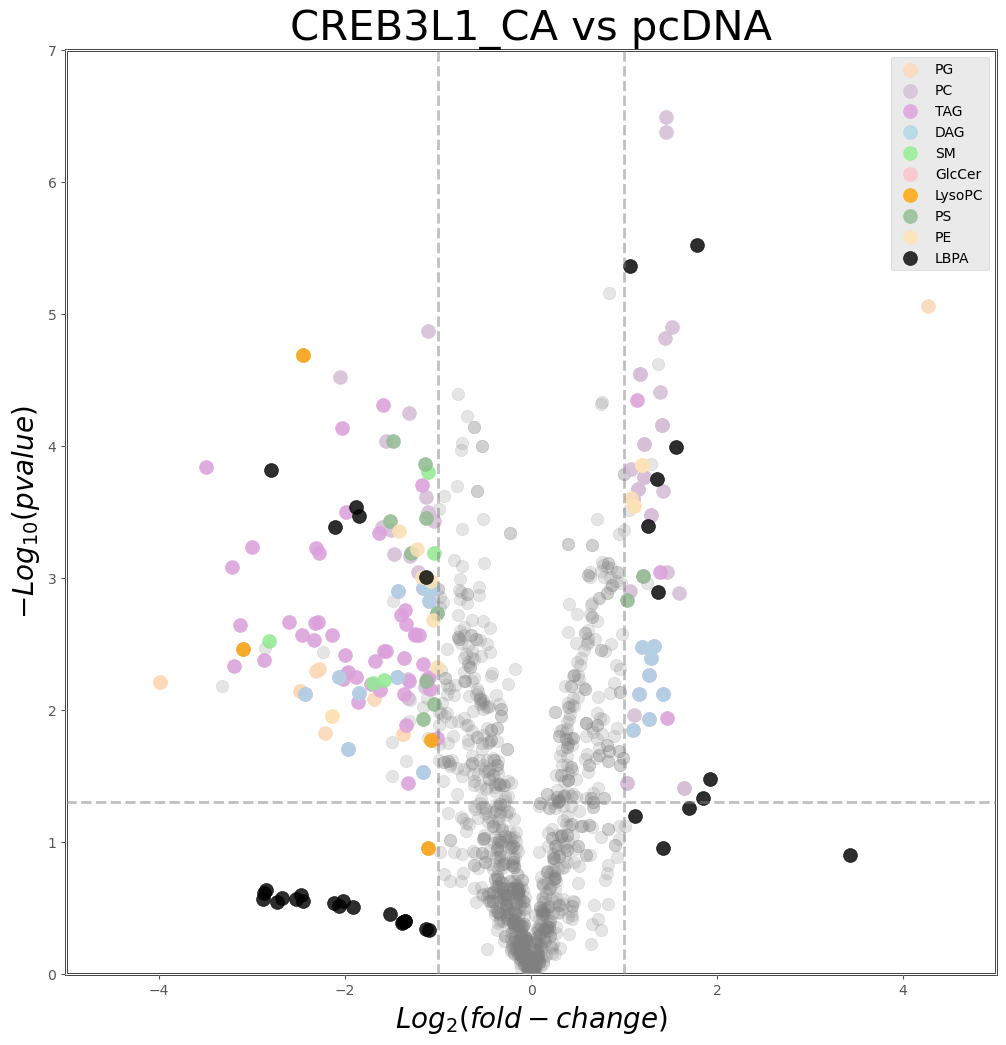

In [23]:
#create the Volcano object

df_pvalue2 = df_pvalue.reset_index()
#df_pvalue2 = df_pvalue2.replace(0, np.nan)
#df_pvalue2 = df_pvalue2.dropna(how='all', axis=0)

v = Volcano(df_pvalue2["log2_fold_change"], df_pvalue2["minuslog10_pvalue"], df_pvalue2["index"], 
            s_curve_x_axis_overplot=.05, 
            s_curve_y_axis_overplot=.5)
tag=['PG','PC','TAG','DAG','SM','GlcCer','LysoPC','PS','PE','LBPA']
#tag= None
fig = v.get_fig(title='CREB3L1_CA vs pcDNA',tags=tag, labels_font=6, color_code=0)
plt.xlim([-5, 5])
fig.savefig(f"../volcano/CREB3L1CAvspcDNA_volcano_{tag}.svg", format='svg', dpi=1200)

In [ ]:
#transform the data to log2

df4 = df2_n.transform(lambda x: np.log2(x.astype('float64')))
df4

#df_t.to_csv('pccl3_creb3l1caVSpcDNA_log2.csv')

In [ ]:
#calculate z_score

z_scores = df2_n.T.transform(lambda x : zscore(x.astype('float64'),ddof=1))
z_scores

## Clustermap and Heatmap

In [ ]:
#Clustermap 

df3 = df2.T.astype('float64').copy()

#Clustermap

ax = sns.clustermap(df3,
                    #z_score = 1,
                    #cmap="vlag",
                    #center=0, 
                    #vmin = -1,
                    #vmax = 1,
                    yticklabels=True,
                    xticklabels=True,
                    figsize=(125, 125),
                    linewidth=.5)

#plt.title('Cluster map', fontsize = 60) # title with fontsize 20
#plt.xlabel('Lipids', fontsize = 80) # x-axis label with fontsize 15
#plt.ylabel('Z - Score', fontsize =80) # y-axis label with fontsize 15

#ax.savefig("databeforecombat.png")

In [ ]:
#Regular Heatmap

fig, ax = plt.subplots(figsize=(80,10))
ax = sns.heatmap(z_scores,
                 linewidth = .1,
                 #vmin=-3,
                 #vmax=3,
                 cmap="YlGnBu")
fig.savefig("pccl3_creb3l1CAVSpcDNA.png")

In [ ]:
#Correlation Clustermap

from scipy.spatial import distance
from scipy.cluster import hierarchy

correlations = df2.corr()
correlations_array = np.asarray(df2.corr())

row_linkage = hierarchy.linkage(
    distance.pdist(correlations_array), method='average')

col_linkage = hierarchy.linkage(
    distance.pdist(correlations_array.T), method='average')

sns.clustermap(correlations, row_linkage=row_linkage, col_linkage=col_linkage, method="average", figsize=(100, 100))

In [ ]:
res = sns.clustermap(df2, standard_scale=0, figsize=(100,100), linewidth = .2)
#res.savefig("pccl3_creb3l1CAVSpcDNA_clustermap.png")

In [ ]:
def extract_clustered_table(res, data):
    """
    input
    =====
    res:     <sns.matrix.ClusterGrid>  the clustermap object
    data:    <pd.DataFrame>            input table
    
    output
    ======
    returns: <pd.DataFrame>            reordered input table
    """
    
    # if sns.clustermap is run with row_cluster=False:
    if res.dendrogram_row is None:
        print("Apparently, rows were not clustered.")
        return -1
    
    if res.dendrogram_col is not None:
        # reordering index and columns
        new_cols = data.columns[res.dendrogram_col.reordered_ind]
        new_ind = data.index[res.dendrogram_row.reordered_ind]
        
        return data.loc[new_ind, new_cols]
    
    else:
        # reordering the index
        new_ind = data.index[res.dendrogram_row.reordered_ind]

        return data.loc[new_ind,:]

In [ ]:
ordered = extract_clustered_table(res, df2)

In [ ]:
df2

In [ ]:
sns.pairplot(df3)

In [ ]:
#Merging of the datasets of all the lipids

data_concat = pd.concat([data_cl, data_n1,data_p1,data_p2], axis=1)
data_concat = data_concat.loc[:,~data_concat.columns.duplicated()]

# And the cell number
data_concat = data_concat.merge(data_cn, on='CP0_ID.BR')

In [ ]:
#Elimination of unnecesary columns
data_concat = data_concat.drop(['Unnamed: 0','CP0_ID.BR','BR','CP0_ID','CP_plate','GENE_y','Series', 'Cell area covered by objects (%)'], axis=1)

In [ ]:
#Same process as before but for cell number
data_concat['Cell number'] = data_concat['Cell number'].apply(pd.to_numeric, errors='coerce')
data_concat = data_concat.groupby(['GENE_x','Batch']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat = data_concat.groupby(['GENE_x']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)

In [ ]:
# Loading / Saving dataset

data_concat.to_csv('rawdata_allkinases.csv')
#data_concat = pd.read_csv('data_concat.csv')
#data_concat = data_concat.drop(['Unnamed: 0'], axis=1)

In [ ]:
# Normalising the data by Cell Number
data_concat.iloc[:,2:756] = data_concat.iloc[:,2:756].div(data_concat['Cell number'], axis=0)
data_concat = data_concat.drop(['Cell number'], axis=1)

In [ ]:
#Outliers removal INSIDE BATCH (z-score > 3)
z_scores = data_concat.groupby(['GENE','Batch']).transform(lambda x : zscore(x,ddof=1))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_concat.iloc[:,2:755] = data_concat.iloc[:,2:755][filtered_entries]

In [ ]:
#Fill the NaNs generated by the removal of the outliers with the mean

data_concat = data_concat.groupby(['GENE','Batch']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat = data_concat.groupby(['GENE']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat.iloc[:,2:755] = data_concat.iloc[:,2:755].apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)

In [ ]:
#Outliers removal OVERALL (z-score > 3)
z_scores = data_concat.iloc[:,2:755].transform(lambda x : zscore(x,ddof=1))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_concat.iloc[:,2:755] = data_concat.iloc[:,2:755][filtered_entries]

In [ ]:
#Fill the NaNs generated by the removal of the outliers with the mean

data_concat = data_concat.groupby(['GENE','Batch']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat = data_concat.groupby(['GENE']).apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)
data_concat.iloc[:,2:755] = data_concat.iloc[:,2:755].apply(lambda x: x.fillna(x.mean()))
data_concat = data_concat.reset_index(drop = True)

In [ ]:
#Transform the data to log10 (OPTIONAL)

#data_log = data_concat
#data_log.iloc[:,2:755] = np.log10(data_log.iloc[:,2:755])

In [ ]:
# Taking the mean for each kinase

concat_mean = data_concat.groupby(['GENE_x']).mean().reset_index()
concat_mean = concat_mean.drop(['Batch'], axis=1)

In [ ]:
#NORMALIZATION USING STANDARD SCALER
scaler = StandardScaler()

concat_mean.iloc[:,2:756] = scaler.fit_transform(concat_mean.iloc[:,2:756].to_numpy())

In [ ]:
#Filtering all the same lipids in one column / grouped by the name of lipids

filter_col_SM = [col for col in batch if col.startswith('SM')]
filter_col_GlcCer = [col for col in batch if col.startswith('Glc')]
filter_col_Cer = [col for col in batch if col.startswith('DHCer')] + [col for col in batch if col.startswith('Cer')]
filter_col_CL = [col for col in batch if col.startswith('CL')]
filter_col_LysoPC = [col for col in batch if col.startswith('LysoPC')]
filter_col_PC = [col for col in batch if col.startswith('PC')]
filter_col_LysoPE = [col for col in batch if col.startswith('LysoPE')]
filter_col_PE = [col for col in batch if col.startswith('PE')]
filter_col_LysoPI = [col for col in batch if col.startswith('LysoPI')]
filter_col_PI = [col for col in batch if col.startswith('PI')]
filter_col_LysoPS = [col for col in batch if col.startswith('LysoPS')]
filter_col_PS = [col for col in batch if col.startswith('PS')]

lipids_sum = filter_col_CL + filter_col_LysoPC + filter_col_PC + filter_col_LysoPE + filter_col_PE + filter_col_SM + filter_col_GlcCer + filter_col_Cer + filter_col_LysoPI + filter_col_PI + filter_col_LysoPS + filter_col_PS

In [ ]:
#Sum up all the all the lipids with the same head-group

batch['CL_Sum'] = batch[filter_col_CL].sum(axis=1)
batch['LysoPC_Sum'] = batch[filter_col_LysoPC].sum(axis=1)
batch['PC_Sum'] = batch[filter_col_PC].sum(axis=1)
batch['LysoPE_Sum'] = batch[filter_col_LysoPE].sum(axis=1)
batch['PE_Sum'] = batch[filter_col_PE].sum(axis=1)
batch['SM_Sum'] = batch[filter_col_SM].sum(axis=1)
batch['GlcCer_Sum'] = batch[filter_col_GlcCer].sum(axis=1)
batch['Cer_Sum'] = batch[filter_col_Cer].sum(axis=1)
batch['LysoPI_Sum'] = batch[filter_col_LysoPI].sum(axis=1)
batch['PI_Sum'] = batch[filter_col_PI].sum(axis=1)
batch['LysoPS_Sum'] = batch[filter_col_LysoPS].sum(axis=1)
batch['PS_Sum'] = batch[filter_col_PS].sum(axis=1)

In [ ]:
# Eliminate non-essential columns and keep only the sumed-up ones

features_sum = ['GENE', 'Batch', 'CL_Sum', 'LysoPC_Sum', 'PC_Sum',
                'LysoPE_Sum', 'PE_Sum', 'SM_Sum', 'GlcCer_Sum', 'Cer_Sum',
                'LysoPI_Sum', 'PI_Sum', 'LysoPS_Sum', 'PS_Sum']
batch_sum = batch[features_sum]

In [ ]:
pd.set_option('display.max_rows', 800)
batch_sum_mean

In [ ]:
#Calculate z-score
from scipy.stats import zscore
zlog_batch = log_batch.apply(zscore)